# ***` Logistic Regression `***

***` Import the Iris data which discusses about three species of flowers namely "Setosa","Verisicolor" and "Virginica" Your task is to build a logistic regression model to distinguish between two  of these speicies using features like "Sepal Length", "Sepal Width", "Petal Length" and "Petal Width"`***

`1)Write a sigmoid function and visualize the sigmoid function,by considering x in the range of (-10,10).`

`2)Plot impact of logloss for single forecasts (You can import log_loss from sklearn.metrics). Make predictions as 0 to 1 in 0.01 increments. (For example,yhat = [x*0.01 for x in range(0, 101)]).Evaluate predictions for a 0 true value.Plot a graph between y_hat and log_loss`

`3)Find the difference between minimum log loss for label 0 and label 1 [1.5 marks]`

`3)Import the Iris Data, and visualize the data to an idea about it.`

`4)Convert the char labels to numerical as logistic regression takes only 0's and 1's and then create new array of numerical labels.After following the procedure as mentioned in the comments , find the difference between means of sepal length of speices "Setosa"(label 0) and "Versicolor"(label 1).[1 marks]`

`5)Split the data in X,y and convert them into arrays`

`6)Use sklearn to split the data (**Important** Consider random_state=42 and test_size=0.2)and perform Logistic Regression`

`7)Find the weights and bias and save it in a list[5 marks]`

`8)Make a prediction on the test data.Find the accuracy of the prediction.[1 marks]`

`9)Also predict the species of the flower whose sepal length=4.9cm	sepal width=4cm	petal length=1.2cm	petal width=0.4cm and return the Species of the data.[1.5 marks]`


In [ ]:
# Run this cell
# import important libraries library
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import model_selection
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import json
%matplotlib inline
ans = [0]*5

# ***`Importing and Visualizing Data`***



In [ ]:
#Sigmoid Function
def sigmoid(x):
  z=1/(1+np.exp(-1*x))
  return z

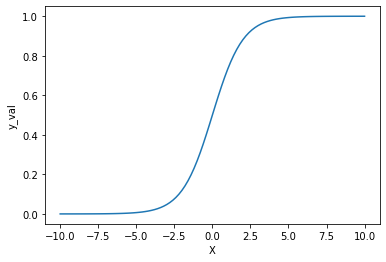

In [ ]:
#Visualize sigmoid function
#Create an array of x_val with values between -10 and 10 
x_val=np.arange(start=-10, stop=10.1, step=0.2)
#Find y_val, by using sigmoid function
y_val=sigmoid(x_val)
#Plot x_val,y_val and label the graph
plt.plot(x_val,y_val)
plt.xlabel('X')
plt.ylabel('y_val')
plt.show()

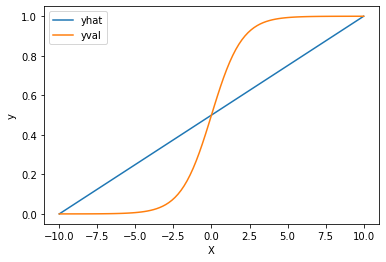

In [ ]:
yhat = [x*0.01 for x in range(0, 101)]
plt.plot(x_val,yhat)
plt.plot(x_val,y_val)
plt.legend(['yhat','yval'])
plt.xlabel('X')
plt.ylabel('y')
plt.show()

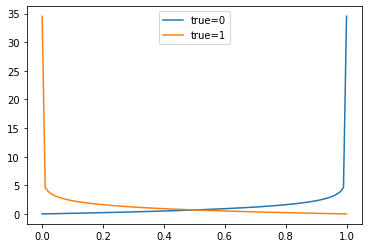

In [ ]:
# Plot impact of logloss for single forecasts
from sklearn.metrics import log_loss
# predictions as 0 to 1 in 0.01 increments
yhat = [x*0.01 for x in range(0, 101)]
# evaluate predictions for a 0 true value
log_losses_0 = [log_loss([0], [x], labels=[0,1]) for x in yhat]
# evaluate predictions for a 1 true value
log_losses_1 = [log_loss([1], [x], labels=[0,1]) for x in yhat]
# plot y_hat to loss
plt.plot(yhat, log_losses_0, label='true=0')
plt.plot(yhat, log_losses_1, label='true=1')
plt.legend()
plt.show()

In [ ]:
#Find the difference between minimum log loss for label 0 and label 1 
ans[0]=np.min(log_losses_0)-np.min(log_losses_1) #0

# ***`Processing the Data`***

In [ ]:
#Import the dataset of iris from datasets.load_iris()
all_data = datasets.load_iris()
print(all_data)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [ ]:
df = pd.DataFrame(all_data.data, columns = all_data.feature_names)
df['label']=all_data.target
groups=all_data.target_names
df.shape, groups

((150, 5), array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [ ]:
#Look into the top 5 rows of data
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


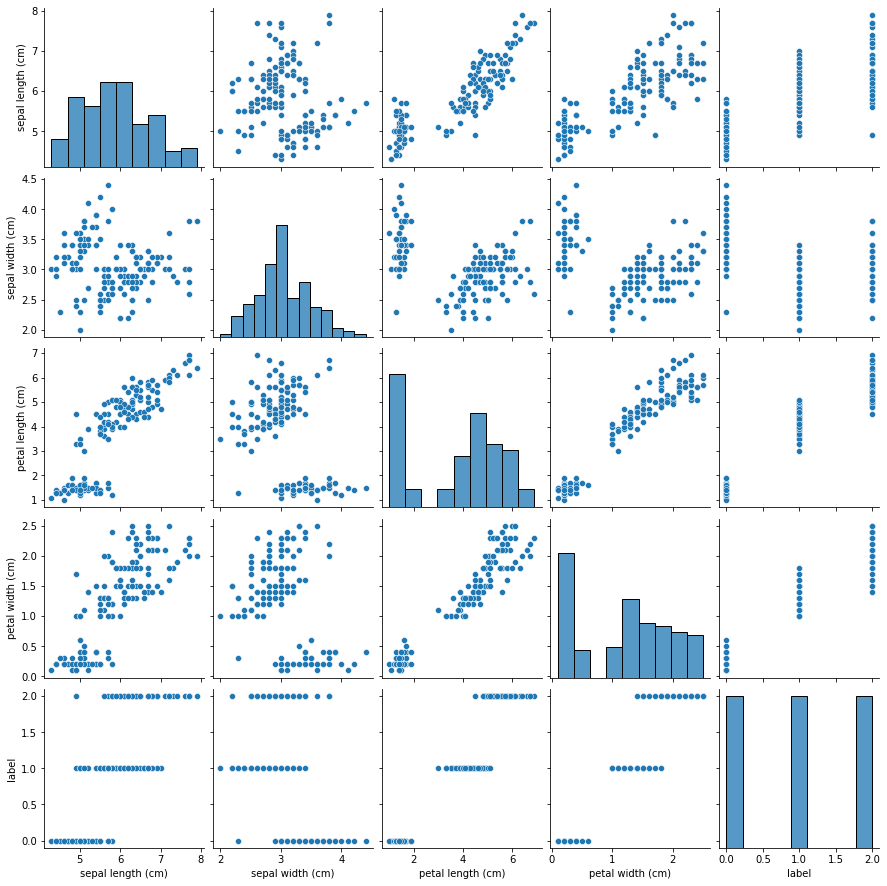

In [ ]:
#Visualize  the data using seaborn pairplot
sns.pairplot(df)

In [ ]:
# Convert char labels into numerical 
#import LabelEncoder which returns array of encoded labels
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
# Create new array of numerical labels
label_num=labelencoder.fit_transform(df['label'])

'''not much useful as the data loaded consists in label encoded form itself'''

In [ ]:
# Drop old labels(char) data 
df.drop(columns=['label'],inplace=True)
# Substitute new labels(numerical) into data
df['label']=label_num
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# Logistic regression only takes the data which has labels 0 and 1, so consider only data['labels']<2
# Considering Iris-setosa as "0" and Iris-versicolor as "1"
df1=df[df['label']<2]
df.shape, df1.shape

((150, 5), (100, 5))

In [ ]:
#Find the difference between means of sepal length of speices "Setosa"(label 0) and "Versicolor"(label 1)
ans[1]=df1[df1['label']==0]['sepal length (cm)'].mean()-df1[df1['label']==1]['sepal length (cm)'].mean()  # -0.93

# ***`Obtaining Weight Values`***

In [ ]:
# Split the data into X and y
X=df1.drop(columns=['label'])
y=df1['label']

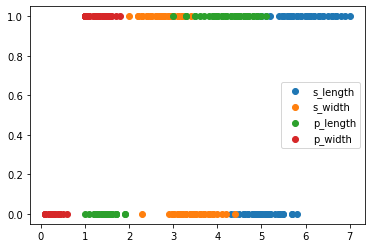

In [ ]:
# Visualize X,y	
plt.scatter(X['sepal length (cm)'],y)
plt.scatter(X['sepal width (cm)'],y)
plt.scatter(X['petal length (cm)'],y)
plt.scatter(X['petal width (cm)'],y)
plt.legend(['s_length','s_width','p_length','p_width'])

In [ ]:
# Convert X,y into arrays
X=np.array(X)
y=np.array(y)

In [ ]:
#Using sklearn to split the data
from sklearn.model_selection import train_test_split
#Take the test size as 0.2 and random_state as 42
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [ ]:
#Importing Necessary Libraries for Logistic Regression 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
#Building our model
model=LogisticRegression()
model.fit(x_train,y_train)
#Finding the parameter and bias
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
#Printing the parameters and bias
model.coef_ , model.intercept_

(array([[ 0.45808171, -0.83895654,  2.21684247,  0.92362595]]),
 array([-6.526665]))

In [ ]:
#Save parameters and bias [w1,w2,w3,w4,b] as one vector 
#i.e if the answer should be in a 1 dimensional list
answer=[]
for x in model.coef_:
  for y_ in x:
    answer.append(y_)
answer.append(float(model.intercept_))
ans[2]=answer

In [ ]:
#Predicitng on our test data
y_hat=model.predict(x_test)

In [ ]:
#Finding the accuracy
acc=accuracy_score(y_test,y_hat)
ans[3]=acc  # 1.0

In [ ]:
#Predict for the input [4.9,4,1.2,0.4] , save the answer ans[4] "Setosa" or "Versicolor"
input=np.array([4.9,4,1.2,0.4])
y_pred=model.predict(input.reshape(1,-1))

if y_pred==0:
  y_pred='Setosa'
elif y_pred==1:
  y_pred='Versicolor'

In [ ]:
#The class of the input 
ans[4]=y_pred  # Setosa

In [ ]:
import json
ans = [str(item) for item in ans]

filename = "Gropu47_omkarmodi5859@gmail.com_Modi_Omkar_LogisticRegression"

# Eg if your name is Saurav Joshi and email id is sauravjoshi123@gmail.com, filename becomes
# filename = sauravjoshi123@gmail.com_Saurav_Joshi_LogisticRegression

## Do not change anything below!!
- Make sure you have changed the above variable "filename" with the correct value. Do not change anything below!!

In [ ]:
from importlib import import_module
import os
from pprint import pprint

findScore = import_module('findScore')
response = findScore.main(ans)
response['details'] = filename
with open(f'evaluation_{filename}.json', 'w') as outfile:
    json.dump(response, outfile)
pprint(response)

ModuleNotFoundError: ignored